# Contents
Install libraries and cust_orders_products_all.pkl

Adress PII

Create regional segmentation

Create exclusion flag for low-activity customers and exclude from data

Create age group

Create income group

Create family status group

Visualizations

Aggregate mean, max, and min for usage frequency and expenditure

# Install Libraries and Data

In [1]:
#install libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Samantha Ramos\Desktop\Instacart Basket Analysis 12-16-2023'

In [3]:
cust_ord_prod = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'cust_orders_products_all.pkl'))

# Address any PII before continuing analysis

In [4]:
cust_ord_prod.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,...,_merge,price_range_loc,busiest_day,busiest_days,max_order,loyalty_flag,user_avg_price,spending_flag,med_order_freq,order_freq_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Regularly busy,Busiest day,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Regularly busy,Regularly busy,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Regularly busy,Busiest day,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Low-range product,Regularly busy,Regularly busy,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Low-range product,Regularly busy,Least busy,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
#delete First Name and Surname columns because they are personally identifiable information and unnecessary to our analysis
cust_ord_prod = cust_ord_prod.drop(columns = ['First Name', 'Surname'])

In [6]:
cust_ord_prod.columns

Index(['user_id', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'max_order', 'loyalty_flag',
       'user_avg_price', 'spending_flag', 'med_order_freq', 'order_freq_flag'],
      dtype='object')

# Create regional segmentation of the data

In [7]:
#check states for any spelling errors/inconsistencies
cust_ord_prod['State'].value_counts(dropna = False)

State
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [8]:
#create the Northeast region
cust_ord_prod.loc[cust_ord_prod['State'].isin({'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut'
                                             , 'New York', 'Pennsylvania', 'New Jersey'}),
                  'Region'] = 'Northeast'

In [9]:
#create the Midwest region
cust_ord_prod.loc[cust_ord_prod['State'].isin({'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota',
                                             'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'}),
                  'Region'] = 'Midwest'

In [10]:
#create the South region
cust_ord_prod.loc[cust_ord_prod['State'].isin({'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
                                             'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee',
                                             'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'}),
                  'Region'] = 'South'

In [11]:
#create the West region
cust_ord_prod.loc[cust_ord_prod['State'].isin({'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
                                             'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'}),
                  'Region'] = 'West'

In [12]:
cust_ord_prod['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

# Create an exclusion flag for low-activity customers

In [13]:
#create an exclusion flag for customers with less than 5 orders
cust_ord_prod['activity'] = cust_ord_prod.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\Samantha Ramos\AppData\Local\Temp\ipykernel_36340\3939749711.py:2: FutureWarning: The provided callable <function amax at 0x0000014E1962AC00> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cust_ord_prod['activity'] = cust_ord_prod.groupby(['user_id'])['order_number'].transform(np.max)


In [14]:
#create categories for 'activity' column
cust_ord_prod.loc[cust_ord_prod['activity'] >= 5, 'exclusion_flag'] = 'high-activity'

In [15]:
cust_ord_prod.loc[cust_ord_prod['activity'] < 5, 'exclusion_flag'] = 'low-activity'

In [16]:
#find frequency of exclusion_flag column
cust_ord_prod['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
high-activity    30964564
low-activity      1440295
Name: count, dtype: int64

In [17]:
#create table to export data to excel
crosstab = pd.crosstab(cust_ord_prod['user_id'], cust_ord_prod['exclusion_flag'], dropna = False)

In [18]:
#copy data
crosstab.to_clipboard()

In [19]:
#drop low-activity customers from data
cust_ord_prod_all = cust_ord_prod.drop(cust_ord_prod[cust_ord_prod['exclusion_flag'] == 'low-activity'].index)

In [20]:
#confirm the low-activity customers were dropped
cust_ord_prod.shape

(32404859, 33)

In [21]:
cust_ord_prod_all.shape

(30964564, 33)

# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database

Create Age Group

In [22]:
#Create a profiling variable based on age
cust_ord_prod_all['Age'].value_counts(dropna = False)

Age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

In [144]:
#find minimum age
cust_ord_prod_all['Age'].min()

18

In [24]:
#find maximum age
cust_ord_prod_all['Age'].max()

81

In [25]:
#find average age
cust_ord_prod_all['Age'].mean()

49.4680256760599

In [151]:
cust_ord_prod_all.loc[cust_ord_prod_all['Age'] <= 30, 'Age Group'] = 'Young Adult'

In [152]:
cust_ord_prod_all.loc[(cust_ord_prod_all['Age'] > 30) & (cust_ord_prod_all['Age'] <= 59), 'Age Group'] = 'Middle-Aged Adult'

In [153]:
cust_ord_prod_all.loc[cust_ord_prod_all['Age'] >= 60, 'Age Group'] = 'Elderly Adult'

In [154]:
#find frequency of Age Group column
cust_ord_prod_all['Age Group'].value_counts(dropna = False)

Age Group
Middle-Aged Adult    14085820
Elderly Adult        10574504
Young Adult           6304240
Name: count, dtype: int64

Our largest consumer is middle-aged adults, followed by elderly adults and young adults, respectively. We should advertise more products that are most frequently purchased by middle-aged adults

Create Income Group

In [30]:
#find minimum income
cust_ord_prod_all['income'].min()

25903

In [31]:
#find maximum income
cust_ord_prod_all['income'].max()

593901

In [32]:
#find average income
cust_ord_prod_all['income'].mean()

99675.86510754681

In [33]:
#create low income category
cust_ord_prod_all.loc[cust_ord_prod_all['income'] <= 70000, 'Income Group'] = 'Low Income'

In [34]:
#create middle income category
cust_ord_prod_all.loc[cust_ord_prod_all['income'] > 70000 & (cust_ord_prod_all['income'] <= 150000), 'Income Group'] = 'Middle Income'

In [35]:
#create high income category
cust_ord_prod_all.loc[cust_ord_prod_all['income'] > 150000, 'Income Group'] = 'High Income'

In [36]:
#find frequency of Age Group column
cust_ord_prod_all['Income Group'].value_counts(dropna = False)

Income Group
Middle Income    27070030
High Income       3894534
Name: count, dtype: int64

Most orders are placed by people in the middle income bracket.

Family Status Group

In [37]:
#find frequency of number of dependants column
cust_ord_prod_all['n_dependants'].value_counts(dropna = False)

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [38]:
#find frequency of marital status column
cust_ord_prod_all['marital_status'].value_counts(dropna = False)

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [39]:
#create married without dependants category
cust_ord_prod_all.loc[(cust_ord_prod_all['marital_status'] == 'married') & (cust_ord_prod_all['n_dependants'] == 0), 'family_status'] = 'married without dependants'

In [40]:
#create married with dependants category
cust_ord_prod_all.loc[(cust_ord_prod_all['marital_status'] == 'married') & (cust_ord_prod_all['n_dependants'] >= 1), 'family_status'] = 'married with dependants'

In [41]:
#create single without dependants category
cust_ord_prod_all.loc[(cust_ord_prod_all['marital_status'] == 'single') & (cust_ord_prod_all['n_dependants'] == 0), 'family_status'] = 'single without dependants'

In [42]:
#create single with dependants category
cust_ord_prod_all.loc[(cust_ord_prod_all['marital_status'] == 'single') & (cust_ord_prod_all['n_dependants'] >= 1), 'family_status'] = 'single with dependants'

In [43]:
#create divorced/widowed without dependants category
cust_ord_prod_all.loc[(cust_ord_prod_all['marital_status'] == 'divorced/widowed') & (cust_ord_prod_all['n_dependants'] == 0), 'family_status'] = 'divorced/widowed without dependants'

In [44]:
#create divorced/widowed with dependants category
cust_ord_prod_all.loc[(cust_ord_prod_all['marital_status'] == 'divorced/widowed') & (cust_ord_prod_all['n_dependants'] >= 1), 'family_status'] = 'divorced/widowed with dependants'

In [45]:
#create living with parents and siblings without dependants category
cust_ord_prod_all.loc[(cust_ord_prod_all['marital_status'] == 'living with parents and siblings') & (cust_ord_prod_all['n_dependants'] == 0), 'family_status'] = 'living with parents and siblings without dependants'

In [46]:
#create living with parents and siblings with dependants category
cust_ord_prod_all.loc[(cust_ord_prod_all['marital_status'] == 'living with parents and siblings') & (cust_ord_prod_all['n_dependants'] >= 1), 'family_status'] = 'living with parents and siblings with dependants'

In [47]:
#find frequency of family status column
cust_ord_prod_all['family_status'].value_counts(dropna = False)

family_status
married with dependants                             21743711
single without dependants                            5094410
divorced/widowed without dependants                  2645271
living with parents and siblings with dependants     1481172
Name: count, dtype: int64

# Visualizations of customer distribution

In [155]:
#create sample
np.random.seed(4)
dev=np.random.rand(len(cust_ord_prod_all))<=0.7

In [156]:
big=cust_ord_prod_all[dev]

In [157]:
small=cust_ord_prod_all[~dev]

In [51]:
df_1 = small[['orders_day_of_week','order_number']]

Text(0.5, 1.0, 'Frquency of Day of Week Ordered')

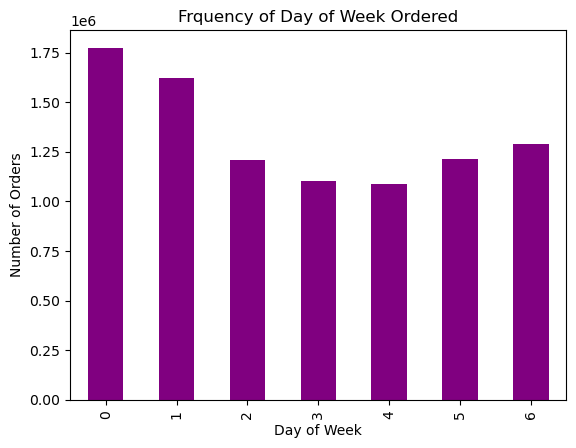

In [52]:
#create a histogram of order_day_of_week column
bar = df_1['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Frequency of Day of Week Ordered')

In [53]:
#export histogram
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_day_of_week.png'))

In [54]:
df_3 = small[['department_id']]

Text(0.5, 1.0, 'Department Popularity')

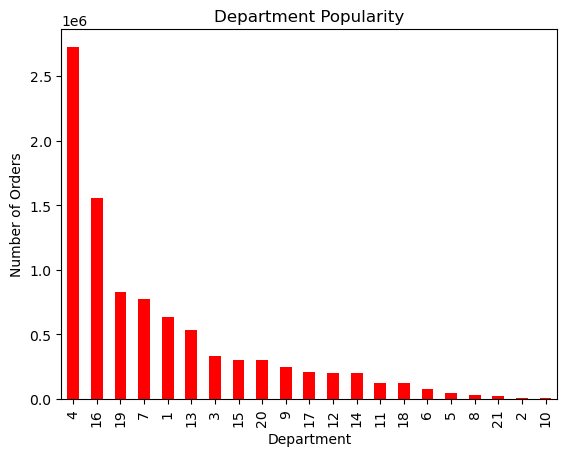

In [55]:
#Are there certain products more popular than others?
bar_1 = df_3['department_id'].value_counts().plot.bar(color = ['red'])
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.title('Department Popularity')

In [56]:
#export bar
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_popularity.png'))

In [62]:
df_4 = small[['loyalty_flag', 'days_since_prior_order']]

In [60]:
df_4.value_counts()

loyalty_flag      days_since_prior_order
Regular customer  7.0                       532369
                  30.0                      426667
Loyal customer    7.0                       406136
                  4.0                       361183
Regular customer  6.0                       358804
                                             ...  
Loyal customer    28.0                        3531
                  25.0                        3478
                  27.0                        2941
                  26.0                        2698
                  29.0                        2120
Name: count, Length: 93, dtype: int64

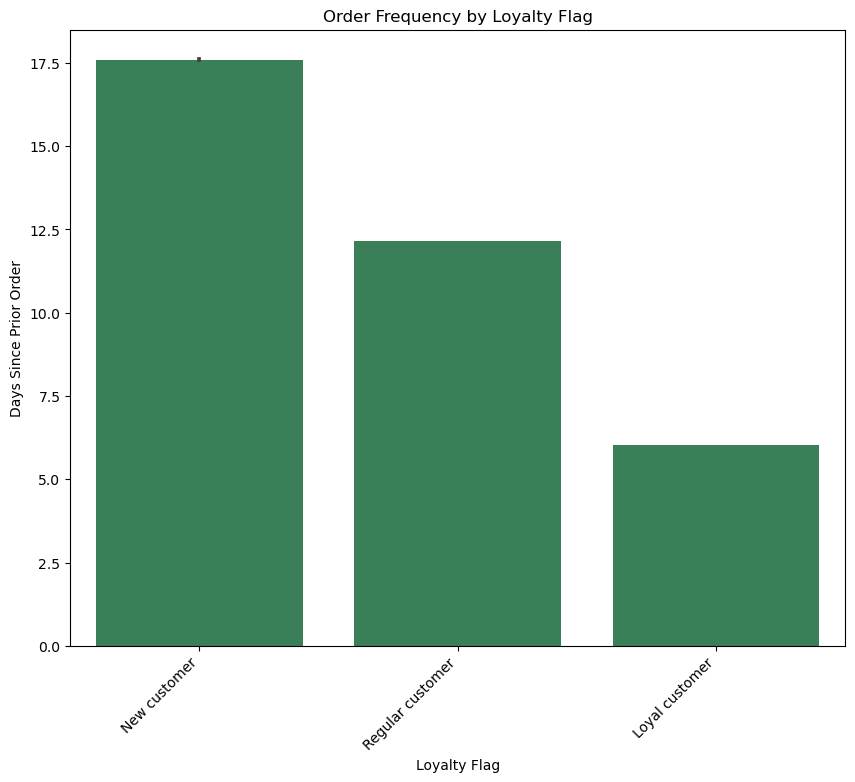

In [70]:
# Display what products people from the various regions purchase
plt.figure(figsize=(6, 3))
bar_2 = sns.barplot(x = 'loyalty_flag', y = 'days_since_prior_order', data = df_4, color = 'seagreen')

# Add labels and title
plt.title('Order Frequency by Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Days Since Prior Order')
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.show()

In [71]:
#export bar
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dspo.png'))

Differences in Order Type Based on Customer Region

In [76]:
cust_ord_prod_all.groupby('Region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
Region                            
Midwest    12.681835  1.0  99999.0
Northeast  11.542582  1.0  99999.0
South      12.118845  1.0  99999.0
West       11.276491  1.0  99999.0

In [75]:
cust_ord_prod_all.groupby('Region')['order_number'].mean()

Region
Midwest      17.602828
Northeast    17.921760
South        17.844674
West         17.971929
Name: order_number, dtype: float64

In [77]:
cust_ord_prod_all.groupby('Region')['orders_day_of_week'].value_counts()

Region     orders_day_of_week
Midwest    0                     1390189
           1                     1263655
           6                     1010086
           2                      947370
           5                      943396
           3                      855316
           4                      851501
Northeast  0                     1043698
           1                      954332
           6                      750282
           5                      716128
           2                      713159
           3                      649305
           4                      637781
South      0                     1955352
           1                     1808348
           6                     1429704
           5                     1342849
           2                     1340387
           3                     1229002
           4                     1205497
West       0                     1519371
           1                     1385351
           6               

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


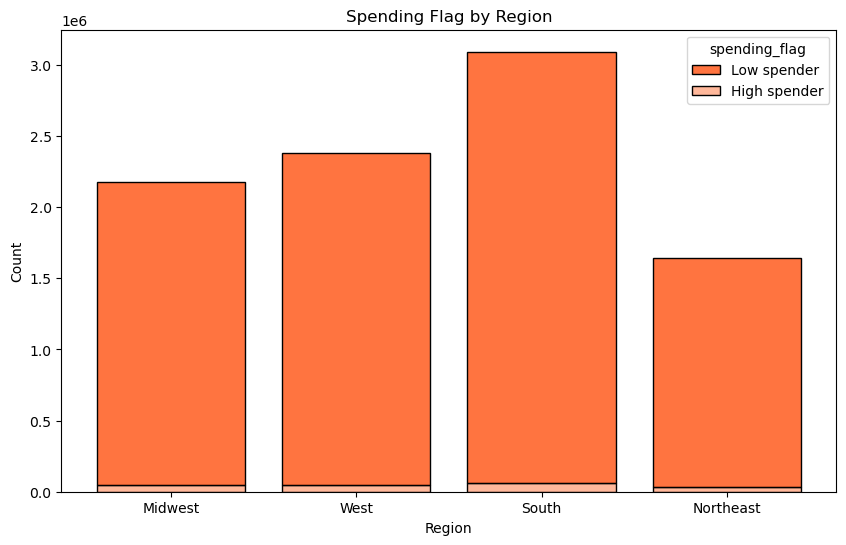

In [88]:
# Bar chart that shows spending flag by region

plt.figure(figsize = (10, 6))
bar_3 = sns.histplot(data = small, x = 'Region', hue = 'spending_flag', multiple = 'stack', 
                     palette =['orangered', 'lightsalmon'], shrink = 0.8, legend = True)

plt.title('Spending Flag by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [89]:
#export bar
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_spending_flag.png'))

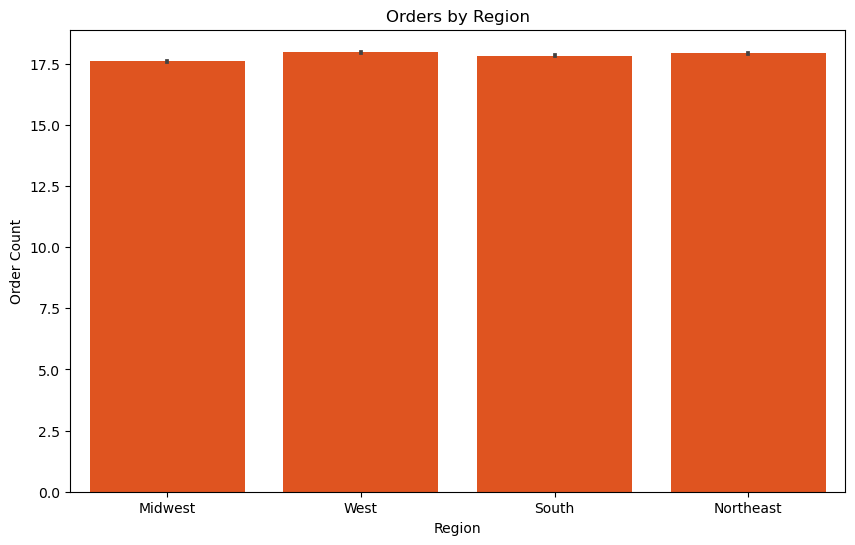

In [93]:
# Bar chart that shows spending flag by region

plt.figure(figsize = (10, 6))
bar_3 = sns.barplot(data = small, x = 'Region', y = 'order_number', 
                     palette =['orangered'])

plt.title('Orders by Region')
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.show()

In [97]:
#import wrangled departments file
dept = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [108]:
#merge departments with data
df_all = dept.merge(cust_ord_prod_all, on = 'department_id', how='outer')

In [109]:
df_all.columns

Index(['department_id', 'department', 'user_id', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'max_order', 'loyalty_flag',
       'user_avg_price', 'spending_flag', 'med_order_freq', 'order_freq_flag',
       'Region', 'activity', 'exclusion_flag', 'Age Group', 'Income Group',
       'family_status'],
      dtype='object')

In [110]:
#create new sample
np.random.seed(4)
dev=np.random.rand(len(df_all))<=0.7

In [111]:
big_1=df_all[dev]

In [114]:
small_1=df_all[~dev]

In [116]:
small_1.columns

Index(['department_id', 'department', 'user_id', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'marital_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'max_order', 'loyalty_flag',
       'user_avg_price', 'spending_flag', 'med_order_freq', 'order_freq_flag',
       'Region', 'activity', 'exclusion_flag', 'Age Group', 'Income Group',
       'family_status'],
      dtype='object')

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


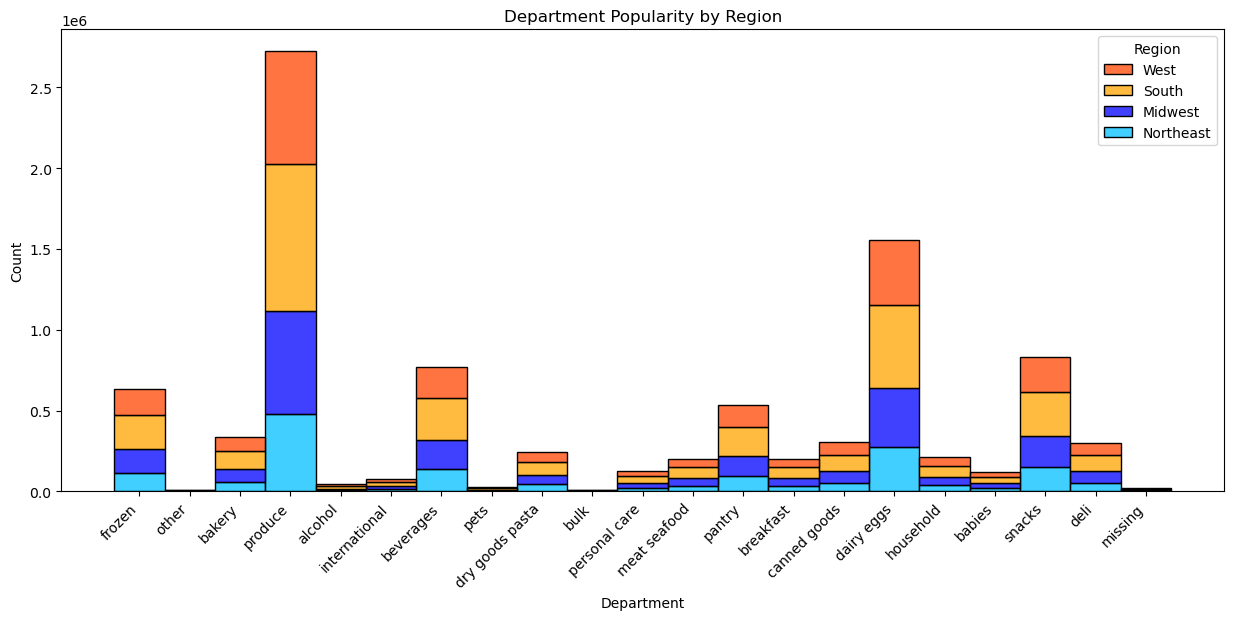

In [120]:
# Bar chart that shows department by region

plt.figure(figsize = (15, 6))
bar_4 = sns.histplot(data = small_1, x = 'department', hue = 'Region', multiple = 'stack', 
                     palette =['orangered', 'orange', 'blue', 'deepskyblue'], legend = True, )

plt.title('Department Popularity by Region')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [121]:
#export bar
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_by_region.png'))

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


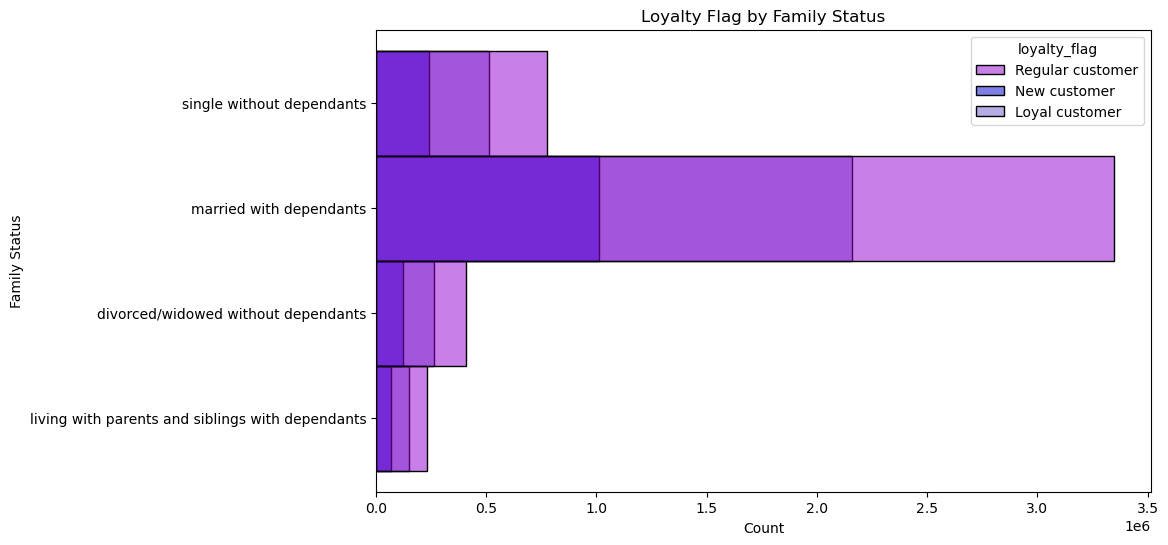

In [130]:
#family status bar chart
plt.figure(figsize = (10, 6))
bar_5 = sns.histplot(data = small_1, y = 'family_status', hue = 'loyalty_flag', 
                     palette =['darkviolet', 'mediumblue', 'slateblue'], legend = True, )

plt.title('Loyalty Flag by Family Status')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.show()

In [131]:
#export chart
bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_loyalty.png'))

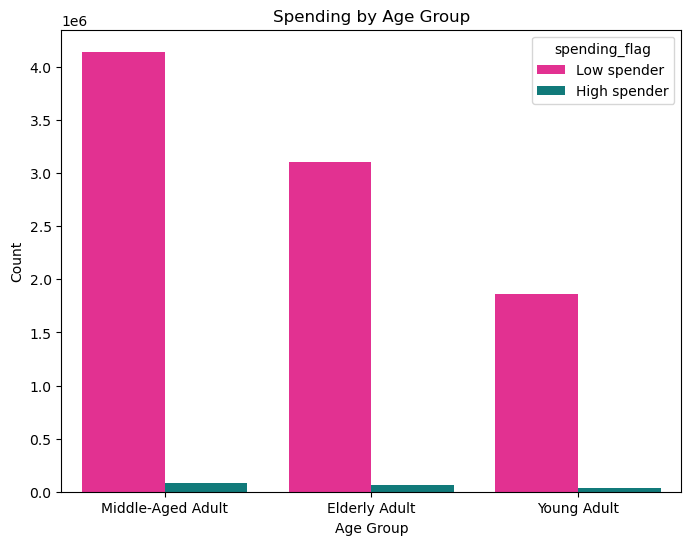

In [163]:
#is there a connection between age and spending habits?
plt.figure(figsize = (8, 6))
bar_6 = sns.countplot(data = small, x = 'Age Group', order = small['Age Group'].value_counts().index, hue = 'spending_flag', 
                     palette =['deeppink', 'darkcyan'])

plt.title('Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [164]:
#export chart
bar_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age.png'))

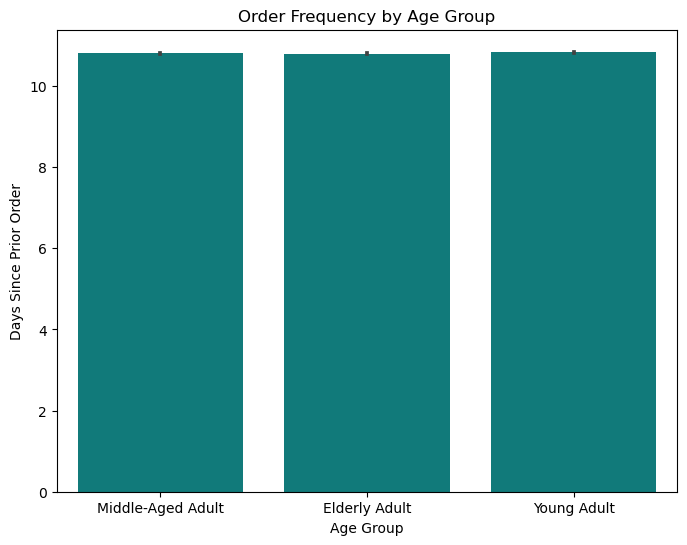

In [169]:
plt.figure(figsize = (8, 6))
bar_7 = sns.barplot(data = small, x = 'Age Group', order = small['Age Group'].value_counts().index, y = 'days_since_prior_order', 
                     palette =['darkcyan'])

plt.title('Order Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Days Since Prior Order')
plt.show()

In [170]:
#export chart
bar_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_freq_age.png'))

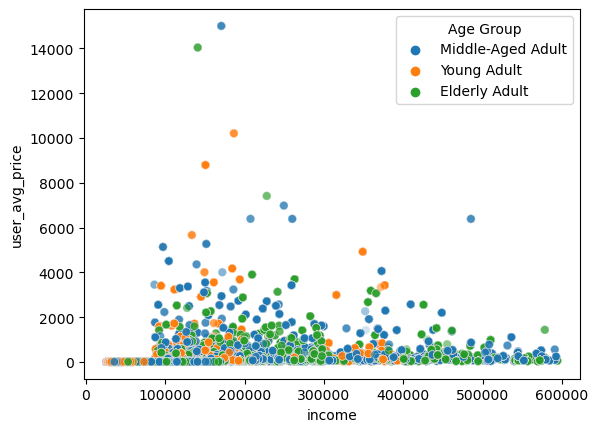

In [173]:
#income vs. price
scat = sns.scatterplot(x = 'income', y = 'user_avg_price', hue = 'Age Group', data = small, alpha=0.1)

In [174]:
#export scatterplot
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_price_income.png'))

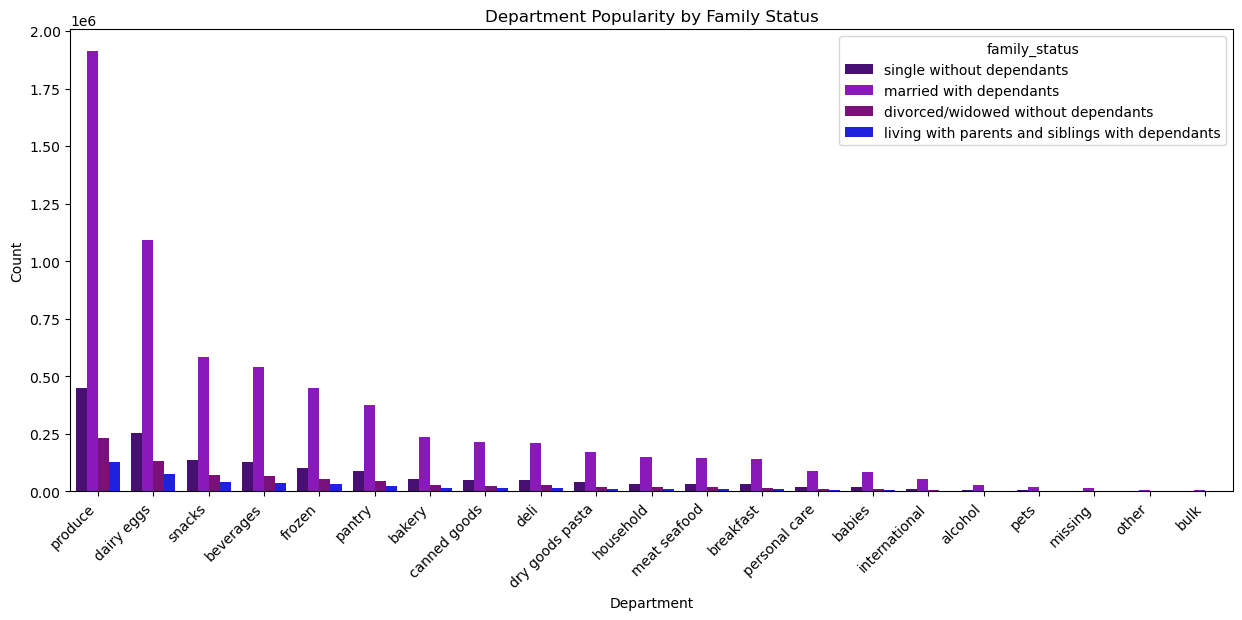

In [180]:
# Bar chart that shows department popularity by family status

plt.figure(figsize = (15, 6))
bar_8 = sns.countplot(data = small_1, x = 'department', order = small_1['department'].value_counts().index, hue = 'family_status', 
                     palette =['indigo', 'darkviolet', 'darkmagenta', 'blue'])

plt.title('Department Popularity by Family Status')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [181]:
#export chart
bar_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_dept.png'))

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [72]:
cust_ord_prod_all.columns

Index(['user_id', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'marital_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'max_order', 'loyalty_flag',
       'user_avg_price', 'spending_flag', 'med_order_freq', 'order_freq_flag',
       'Region', 'activity', 'exclusion_flag', 'Age Group', 'Income Group',
       'family_status'],
      dtype='object')

In [73]:
cust_ord_prod_all.groupby(['family_status', 'Age Group', 'Income Group']).agg({'prices':['mean', 'median', 'min', 'max'], 'orders_day_of_week':['mean', 'median', 'min', 'max'], 'order_hour_of_day':['mean', 'median', 'min', 'max'], 'days_since_prior_order':['mean', 'median', 'min', 'max']})

prices  \
                                                                                        mean   
family_status                                    Age Group         Income Group                
divorced/widowed without dependants              Elderly Adult     High Income     22.510961   
                                                                   Middle Income    8.882897   
living with parents and siblings with dependants Middle-Aged Adult High Income    186.468804   
                                                                   Middle Income    9.097500   
married with dependants                          Elderly Adult     High Income     25.007590   
                                                                   Middle Income    8.718414   
                                                 Middle-Aged Adult High Income     39.467402   
                                                                   Middle Income    8.968009   
single without dependants                        Middle-Aged Adult High Income     42.501080   
                                                                   Middle Income    9.251947   

                                                                                         \
                                                                                 median   
family_status                                    Age Group         Income Group           
divorced/widowed without dependants              Elderly Adult     High Income      7.6   
                                                                   Middle Income    7.3   
living with parents and siblings with dependants Middle-Aged Adult High Income      7.7   
                                                                   Middle Income    7.4   
married with dependants                          Elderly Adult     High Income      7.7   
                                                                   Middle Income    7.3   
                                                 Middle-Aged Adult High Income      7.6   
                                                                   Middle Income    7.3   
single without dependants                        Middle-Aged Adult High Income      7.6   
                                                                   Middle Income    7.3   

                                                                                       \
                                                                                  min   
family_status                                    Age Group         Income Group         
divorced/widowed without dependants              Elderly Adult     High Income    1.0   
                                                                   Middle Income  1.0   
living with parents and siblings with dependants Middle-Aged Adult High Income    1.0   
                                                                   Middle Income  1.0   
married with dependants                          Elderly Adult     High Income    1.0   
                                                                   Middle Income  1.0   
                                                 Middle-Aged Adult High Income    1.0   
                                                                   Middle Income  1.0   
single without dependants                        Middle-Aged Adult High Income    1.0   
                                                                   Middle Income  1.0   

                                                                                           \
                                                                                      max   
family_status                                    Age Group         Income Group             
divorced/widowed without dependants              Elderly Adult     High Income    99999.0   
                                                                   Middle Income  99999.0   
living with parents and siblin